In [3]:
import matplotlib.pyplot as plt


class Situatie(object):
    
    def __init__(self,totaaljaren,
                 huurjaren,
                 leenjaren,
                 huur,
                 kostprijs_huis,
                 eigen_geld,
                 extra_lenen_van_ouders,
                 jkp,
                 inkomen,
                 levenskost):
        self.totaaljaren = totaaljaren # aantal jaren waarop de simulatie wordt berekend
        self.huurjaren = huurjaren # aantal jaren dat we huren (vanaf nu)
        self.leenjaren = leenjaren # aantal jaren dat we een lening hebben
        self.huur = huur # maandelijke kostprijs huur
        self.kostprijs_huis = kostprijs_huis # totale kostprijs van huis
        self.eigen_geld = eigen_geld # hoeveel eigen geld we nu hebben
        self.extra_lenen_van_ouders = extra_lenen_van_ouders # Hoeveel geld we lenen van de ouders
        self.jkp = jkp # de jkp die we kunnen krijgen (dit is afhankelijk van het aantal leenjaren)
        self.inkomen = inkomen # ons inkomen per maand
        self.levenskost = levenskost # hoeveel kost ons gezin gemiddeld per maand?
        
    def huur_totaal(self):
        return self.huurjaren * 12 * self.huur
    
    def netto_inkomen(self):
        return self.inkomen - self.levenskost
    
    def gespaard_tijdens_huur_maand(self):
        return self.netto_inkomen() - self.huur
    
    def totaal_gespaard_na_huren(self):
        return self.huurjaren * 12 * self.gespaard_tijdens_huur_maand()
    
    def lening(self):
        return (self.kostprijs_huis 
                - self.totaal_gespaard_na_huren() 
                - self.eigen_geld 
                - self.extra_lenen_van_ouders)
    
    def kostprijs_lening(self):
        '''
        Dit is een ruwe schatting, maar komt heel goed overeen met aflossingstabellen op het internet
        Is eerder een overschatting van de totale kostprijs.
        '''
        extra = 0
        bedrag = self.lening()
        for _i in range(self.leenjaren):
            extra += (bedrag * self.jkp * 0.01)
            bedrag -= self.lening() / self.leenjaren
        return self.lening() + extra
    
    def kost_per_maand_huis(self):
        return self.kostprijs_lening() / self.leenjaren / 12
    
    def gespaard_tijdens_huis_maand(self):
        return (self.netto_inkomen() - self.kost_per_maand_huis())
    
    def gespaard_tijdens_huis_totaal(self):
        return self.gespaard_tijdens_huis_maand() * 12 * self.leenjaren
    
    def totale_kost(self):
        return (self.huur_totaal() 
                + self.lening_totaal()
                + self.eigen_geld
                + self.extra_lenen_van_ouders)
    
    def kosteloze_jaren(self):
        return self.totaaljaren - self.huurjaren - self.leenjaren
    
    def gespaard_na_afbetaling_huis_totaal(self):
        return self.kosteloze_jaren() * 12 * self.netto_inkomen()
    
    def gespaard_totaal(self):
        return (self.gespaard_tijdens_huis_totaal()
                + self.gespaard_na_afbetaling_huis_totaal()
                - self.extra_lenen_van_ouders)
    
    def bankrekening_evolutie(self):
        
        xs = []
        bankrekening = self.eigen_geld
        for i in range(self.huurjaren):
            bankrekening += self.gespaard_tijdens_huur_maand() * 12
            xs.append(bankrekening)
        
        bankrekening -= self.totaal_gespaard_na_huren()
        bankrekening -= self.eigen_geld 
        bankrekening -= self.extra_lenen_van_ouders
        
        for i in range(self.leenjaren):
            bankrekening += self.gespaard_tijdens_huis_maand() * 12
            xs.append(bankrekening)
                
        for i in range(self.kosteloze_jaren()):
            bankrekening += self.netto_inkomen() * 12
            xs.append(bankrekening)
        return xs
    
    def info(self):
        return 'eindtotaal: %i, %i per maand' % (int(self.gespaard_totaal()), int(self.kost_per_maand_huis()))

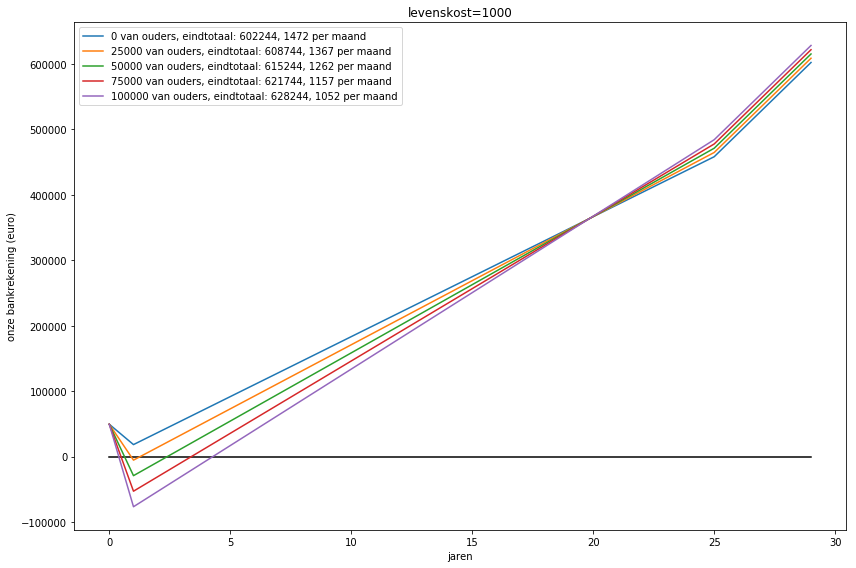

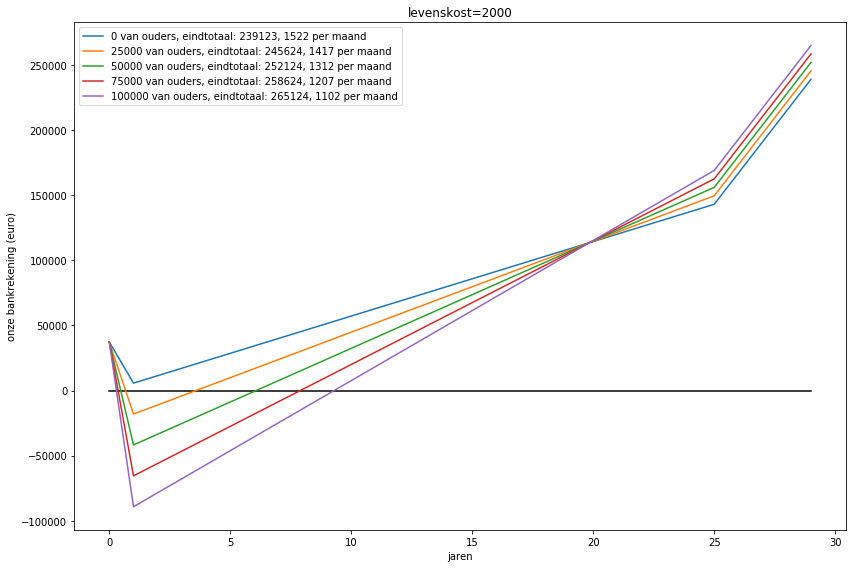

In [7]:
for levenskost in [1000,2000]:
    
    s = Situatie(totaaljaren=30,
             huurjaren=1,
             leenjaren=25,
             huur = 550,
             kostprijs_huis = 400000,
             eigen_geld = 20000,
             extra_lenen_van_ouders = 0,
             jkp = 2,
             inkomen = 4000,
             levenskost = levenskost)
    
    plt.figure(figsize=(12,8))
    plt.plot([0 for _ in range(s.totaaljaren)],color='black')

    for extra_lenen_van_ouders in [0,25000,50000,75000,100000]:
        s.extra_lenen_van_ouders = extra_lenen_van_ouders
        label = f'{extra_lenen_van_ouders} van ouders'
        plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())

    plt.legend()
    plt.title(f'levenskost={levenskost}')
    plt.xlabel("jaren")
    plt.ylabel("onze bankrekening (euro)")
    plt.tight_layout()
    plt.show()

# conclusie
# extra lenen van ouders kan de moeite zijn, maar dan blijven we wel enkele jaren onder nul
# en we verbeteren maar onze financiële situatie vanaf jaar 20.
# Hoe groter onze levenskost, hoe groter het probleem van de negatieve jaren...
# Als we kinderen hebben (hoge levenskost) kunnen we echt geen 5-10 jaar onder nul blijven.
# Als we geen kinderen hebben (lage levenskost), dan wat kan ons die 20k binnen 25 jaar schelen?
# => Niet lenen van ouders, (of max 50000)

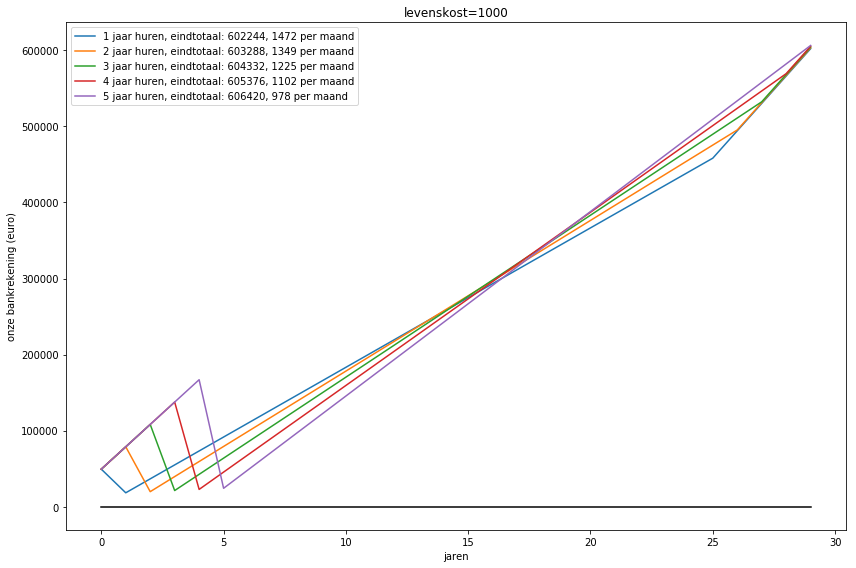

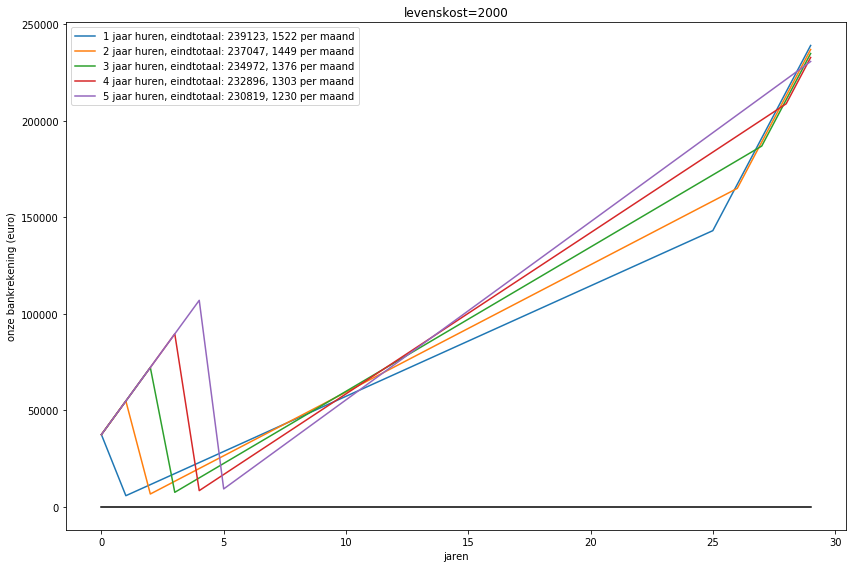

In [5]:
for levenskost in [1000,2000]:
    
    s = Situatie(totaaljaren=30,
             huurjaren=1,
             leenjaren=25,
             huur = 550,
             kostprijs_huis = 400000,
             eigen_geld = 20000,
             extra_lenen_van_ouders = 0,
             jkp = 2,
             inkomen = 4000,
             levenskost = levenskost)
    
    plt.figure(figsize=(12,8))
    plt.plot([0 for _ in range(s.totaaljaren)],color='black')

    for huurjaren in [1,2,3,4,5]:
        s.huurjaren = huurjaren
        label = f'{huurjaren} jaar huren'
        plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())

    plt.legend()
    plt.title(f'levenskost={levenskost}')
    plt.xlabel("jaren")
    plt.ylabel("onze bankrekening (euro)")
    plt.tight_layout()
    plt.show()

# conclusie
# huren maakt bijna geen enkel verschil in uiteindelijke opbrengst
# We zijn ook maar (tijdelijk) beter af binnen 10-15 jaar door langer te huren...
# Als we kinderen hebben, maakt het wel nog een relatief groot verschil uit voor als ze pubers zijn.
# Het verschil is niet dramatisch genoeg om het ons veel aan te trekken
# Dus, zo snel mogelijk in ons huis!

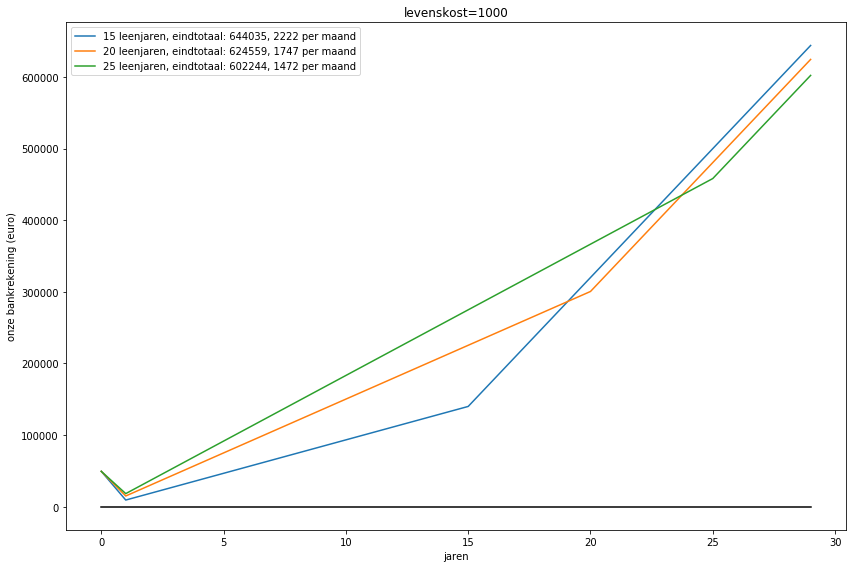

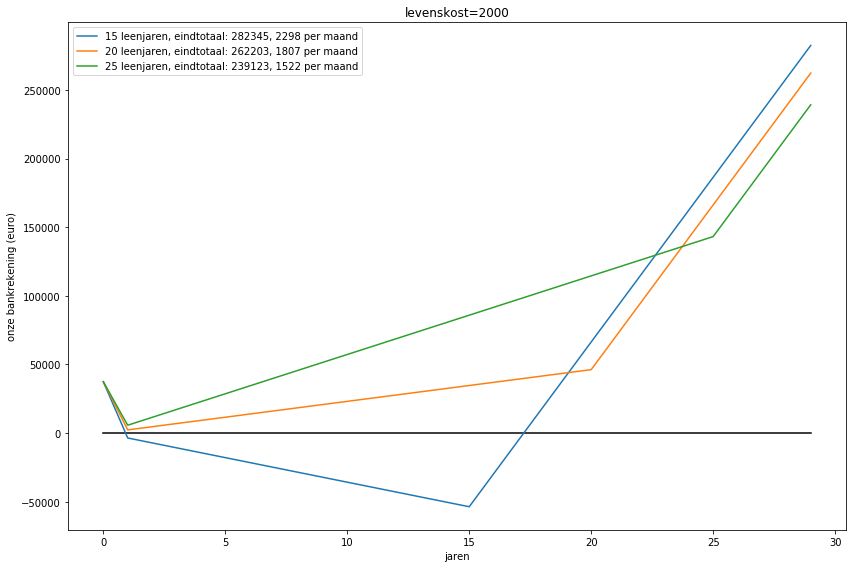

In [6]:
for levenskost in [1000,2000]:
    
    s = Situatie(totaaljaren=30,
             huurjaren=1,
             leenjaren=25,
             huur = 550,
             kostprijs_huis = 400000,
             eigen_geld = 20000,
             extra_lenen_van_ouders = 0,
             jkp = 2,
             inkomen = 4000,
             levenskost = levenskost)
    
    plt.figure(figsize=(12,8))
    plt.plot([0 for _ in range(s.totaaljaren)],color='black')

    for leenjaren,jkp in [
        (15,1.76),
        (20,1.87),
        (25,2)
    ]:
        s.leenjaren = leenjaren
        s.jkp = jkp
        label = f'{leenjaren} leenjaren'
        plt.plot(s.bankrekening_evolutie(), label= label + ', ' + s.info())

    plt.legend()
    plt.title(f'levenskost={levenskost}')
    plt.xlabel("jaren")
    plt.ylabel("onze bankrekening (euro)")
    plt.tight_layout()
    plt.show()

# Conclusie
# relatief groot verschil, MAAR we zien het verschil pas na 22 jaar...
# hoge afbetaling per maand wordt ook problematischer naarmate de levenskost stijgt
# => lenen op 25 jaar